Converged after 3248 iterations with error 9.99e-07


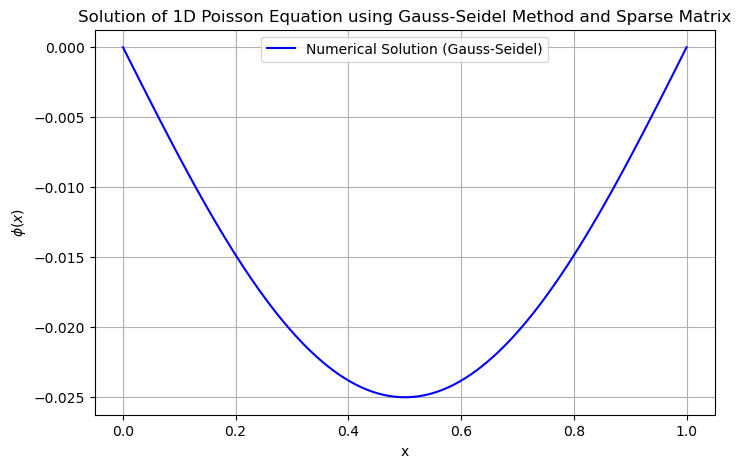

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Parameters
N = 100  # Number of grid points
L = 1.0  # Length of the domain
phi_L = 0.0  # Boundary condition at x = 0
phi_R = 0.0  # Boundary condition at x = 1
dx = L / (N - 1)  # Grid spacing

# Create the grid points
x = np.linspace(0, L, N)

# Define the source term s(x) = x * (1 - x)
s = x * (1 - x)

# Construct the sparse matrix A
diagonals = [
    np.ones(N-1),        # Upper diagonal
    -2 * np.ones(N),     # Main diagonal
    np.ones(N-1)         # Lower diagonal
]
offsets = [-1, 0, 1]
A = diags(diagonals, offsets, format='csr') / dx**2

# Construct the right-hand side vector b
b = -s.copy()
b[0] = phi_L
b[-1] = phi_R

# Apply boundary conditions to the matrix A
A = A.tolil()  # Convert to LIL format for easy modification
A[0, 0] = 0.0
A[0, 1] = 0.0
A[-1, -1] = 0.0
A[-1, -2] = 0.0

# Convert matrix back to CSR format
A = A.tocsr()

# Initial guess for phi
phi = np.zeros(N)
phi[0] = phi_L
phi[-1] = phi_R

# Parameters for the Gauss-Seidel method
max_iter = 10000  # Maximum number of iterations
tolerance = 1e-6  # Convergence criterion

# Gauss-Seidel iterative method
for iteration in range(max_iter):
    phi_old = phi.copy()

    # Update phi values using Gauss-Seidel formula
    for i in range(1, N-1):
        phi[i] = 0.5 * (phi[i-1] + phi[i+1] - dx**2 * s[i])

    # Calculate the error (infinity norm)
    error = np.linalg.norm(phi - phi_old, ord=np.inf)

    # Check convergence
    if error < tolerance:
        print(f"Converged after {iteration} iterations with error {error:.2e}")
        break
else:
    print("Did not converge within the maximum number of iterations")

# Plot the numerical solution
plt.figure(figsize=(8, 5))
plt.plot(x, phi, label='Numerical Solution (Gauss-Seidel)', color='b')
plt.xlabel('x')
plt.ylabel(r'$\phi(x)$')
plt.title('Solution of 1D Poisson Equation using Gauss-Seidel Method and Sparse Matrix')
plt.grid(True)
plt.legend()
plt.show()
